<a href="https://colab.research.google.com/github/aoc-ptctech/allinone2022/blob/main/jcplessis/Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
def parse(input):
  return [[int(x) for x in line] for line in input.split("\n")]

def is_visible_in_direction(matrix, x, y, dx, dy):
  tree_height = matrix[y][x]
  while not is_on_the_side(matrix, x, y):
    x += dx
    y += dy
    if tree_height <= matrix[y][x]:
      return False
  return True

def is_visible(matrix, x, y):
  return is_visible_in_direction(matrix, x, y, 0, -1) or \
    is_visible_in_direction(matrix, x, y, 0, 1) or \
    is_visible_in_direction(matrix, x, y, -1, 0) or \
    is_visible_in_direction(matrix, x, y, 1, 0) 

def is_on_the_side(matrix, x, y):
  return x == 0 or y == 0 or y == len(matrix) - 1 or x == len(matrix[0]) - 1

def count_visible_trees(input):
  result = 0
  matrix = parse(input)
  for y in range(len(matrix)):
    for x in range(len(matrix[y])):
      if is_visible(matrix, x, y):
        result += 1
  return result

def viewing_distance_in_direction(matrix, x, y, dx, dy):
  tree_height = matrix[y][x]
  result = 0
  while not is_on_the_side(matrix, x, y):
    result += 1
    x += dx
    y += dy
    if tree_height <= matrix[y][x]:
      return result
  return result

def compute_scenic_score(matrix, x, y):
  return viewing_distance_in_direction(matrix, x, y, 0, -1) * \
    viewing_distance_in_direction(matrix, x, y, 0, 1) * \
    viewing_distance_in_direction(matrix, x, y, -1, 0) * \
    viewing_distance_in_direction(matrix, x, y, 1, 0) 

def find_best_view(input):
  result = 0
  matrix = parse(input)
  for y in range(len(matrix)):
    for x in range(len(matrix[y])):
      scenic_score = compute_scenic_score(matrix, x, y)
      if scenic_score > result:
        result = scenic_score
  return result

def to_scenic_score(input):
  result = parse(input)
  matrix = parse(input)
  for y in range(len(matrix)):
    for x in range(len(matrix[y])):
      result[y][x] = compute_scenic_score(matrix, x, y)
  return result


In [224]:
import unittest

example = """30373
25512
65332
33549
35390"""

class TestAcceptance(unittest.TestCase):

    def test_parse_trees(self):
      self.assertEqual([[1,2], [3,4]], parse("""12
34"""))
      
    def test_is_on_the_side(self):
      self.assertTrue(is_on_the_side([[1, 2, 3], [4, 5, 6], [7,8,9]], 0, 1))
      self.assertTrue(is_on_the_side([[1, 2, 3], [4, 5, 6], [7,8,9]], 2, 1))
      self.assertTrue(is_on_the_side([[1, 2, 3], [4, 5, 6], [7,8,9]], 1, 2))
      self.assertTrue(is_on_the_side([[1, 2, 3], [4, 5, 6], [7,8,9]], 2, 2))
      self.assertFalse(is_on_the_side([[1, 2, 3], [4, 5, 6], [7,8,9]], 1, 1))
      
    def test_is_visible_in_direction(self):
      matrix = parse(example)
      self.assertTrue(is_visible_in_direction(matrix, 0, 1, 0, -1))
      self.assertTrue(is_visible_in_direction(matrix, 1, 1, 0, -1))
      self.assertFalse(is_visible_in_direction(matrix, 3, 1, 0, -1))

    def test_is_visible(self):
      matrix = parse(example)
      self.assertTrue(is_visible(matrix, 0, 1))
      self.assertTrue(is_visible(matrix, 1, 1))
      self.assertFalse(is_visible(matrix, 3, 1))

    def test_count_visible_trees(self):
      self.assertEqual(21, count_visible_trees(example))

    def test_viewing_distance_in_direction(self):
      matrix = parse(example)
      self.assertEqual(1, viewing_distance_in_direction(matrix, 2, 1, 0, -1))
      self.assertEqual(1, viewing_distance_in_direction(matrix, 2, 1, -1, 0))
      self.assertEqual(2, viewing_distance_in_direction(matrix, 2, 1, 1, 0))
      self.assertEqual(2, viewing_distance_in_direction(matrix, 2, 1, 0, 1))
      
      self.assertEqual(0, viewing_distance_in_direction(matrix, 0, 1, 0, -1))

    def test_compute_scenic_score(self):
      matrix = parse(example)
      self.assertEqual(4, compute_scenic_score(matrix, 2, 1))
      self.assertEqual(8, compute_scenic_score(matrix, 2, 3))
            

    def test_find_best_view(self):
      self.assertEqual(8, find_best_view(example))

  
unittest.main(argv=[''], verbosity=2, exit=False)

test_compute_scenic_score (__main__.TestAcceptance) ... ok
test_count_visible_trees (__main__.TestAcceptance) ... ok
test_find_best_view (__main__.TestAcceptance) ... ok
test_is_on_the_side (__main__.TestAcceptance) ... ok
test_is_visible (__main__.TestAcceptance) ... ok
test_is_visible_in_direction (__main__.TestAcceptance) ... ok
test_parse_trees (__main__.TestAcceptance) ... ok
test_viewing_distance_in_direction (__main__.TestAcceptance) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.035s

OK


In [225]:
#@title Define my input
input = """201221222310231210121242440413113300240004414452541255451423433301424221344321231200331000322022002
201110223212021301023231110004043440041124554211551214344435531144314002144220404322120300310201221
022020021300232232214420211402302113414555244354252313411231531323042333142321430241331131200211211
220101300101000212103133214111232525452452133144332223522145134313243143203441411323220330102101001
010013203211303344414334400001453124241242341433545332514312432413253552020220000011210222220213011
212222232311011011440242233434421552552224125313441224221452233155422331202244211404341301032111221
000210330211043141131201411214315555313554234431241423355241553322445342213244404311341411322311202
223012310332312111412202422252114251233433231164552322424224355244442532524110421232041401022103023
203212231033131211203222534413454122353525263556454546253645235311231121525153501243212023122321022
331310310124001323434212433231115432336534526522236536443633424625133244551543134110203434332100312
331233200232041103145125233451334566232552254635666656442655453534423322531411521134033421402331113
031333212400213344515542322452113324522342242354445452323465365534254431442152141421403144041023001
111303221312241302432354252153225363664664442542334456666266653255363425131231313432040341201422111
230022101140423311411245143352262322642565656564543663352325633432652452234241222524242132111120233
111002202003112133533152425634325552524645656633433542422554263422566342523144454431451112432214030
111104231403421133411522455246633653622253675366665655474442525346262352454224513234245423104124211
321141142120031135251255344323625365664335656464755544364767363442333262542665522525235523422123233
101014313242515522434326534623634543435675343737464477766767446534622342246356341444354234003142123
230232022033253314544352254635535575447345373545434435677453676557464324566466565421351335242321112
324420241333415323423265626324463475735354336456636435774744665334656336663634352353155433241211310
030100032243154112253364662343673653443776356553363473564676474674635776342552423313423224203120400
313344442241532454632632336565534536554545477575457734636653646644647334462532342224431251430133234
413132014253243413424445624573635374656346678654756887657637545745737634534436636222324125242024402
113100413333534433542565454674475563733488675576676868477648876554567666766524232656445322351414434
114123223232332232425343334636336773665747648846868678874577587766673644456465643265412421521201133
433041012151413325526323343447553567487566866867587566644445775875465754663466453542555421131441103
132340522435542462363422743774554376876785448587855877476675458688567373747442443245466552432324421
001021233221345225425647476736373858864468748564666587766576444778854633746456543224536224435144343
234221341152333442436376347375644678848647767874568458768858755578688754766533335643636425251131120
223105335322336464234466337533744687566688488899576587584868474485578476665654335343233341545541334
033032325442253263357677467463487786576588697995668587567655778544556877377544477336442225211523122
140154353323233625364336546576744454876575996956886776576698948786578676567434555522432665455131440
313521251524264253333577755458448688767956867777976656866587658447444445736763345764252422513242253
023424511426543544456663343755755748459566799865656687669788797758646748467363475635422256153224140
040321314324626545436674534784547758568766757677656858969886995695558567665737443363252565415344150
224134232343325522357534768848688787957655668596789999966575677878845446876456535336624424222231455
224141351544346645675355675766745888689569556687686779798865896789645846755553675353243252243411351
244135535456323653555537764747588998878955767878976797986558678967577874764547747434464533344425143
254344551326626563754656664464666866556959896686868789977787865795759658468474457364425643642411212
453432354266544435774445865475849765579556687767886876969778786857895575464486457633352542454311531
431323446665534437654774645868555875879887996699999976678997889596655848857674674334366422332131423
245452135325546335457446744684476967899679886979879698996697897997855964867458477746622265232555354
234513546444464376734635746755778769688676799687796696888799766889765865688876373437542642226125433
124245215563245676536345888666777599898988777699697986779696866797658566868868473643632652666351533
412451132633344473454648745764658888566869867687787987999777797986588975866654457357332433335414444
214414333445644664644347747885599757698899697887778998877986788877899565665758765536654545622452534
425352443532542334775575668585985767578876979977998988887887686767885597575655766766575354653322551
341323343434654663634654547879857799886688998878777779988866688979775597457468777564472225534313232
545124425425455546466668554678699967677669899897978998898998899788599766464844645635647324555615353
545411452345263737347485844557977699997899687999898887897977788878767859456654535453376264223653425
111311152252635334446768747469768968699976777899879777888798889676865859677666767645565466525231355
425533525462234753747757456555769688687686979977799979989866679677777588445675575365667543425623154
544233366232657335455767466465965566867896878789799899889796686878588976676765454545775533424511523
213441153422342646773654455468595778797987868997988897788886776776976696886686865337772632526551333
223554452333265577776587466746956965867898778978889799987988779678679598566887477545354665523235112
534133436255443447675576556488868877777996999897777877778886976875596896865556547544762534525314442
333241456452523646365586568585659757669779697699977988966878999966669897486554437473446232234121511
344115333364664776766656745848985588696899986667878779686697767998659797666847675734735245222231442
414421116236222746557346445556667785989969776897796778779898766568585677544857777436565343263435252
133434525653633667577578654688666889977898699697679686969897867589679554764664774745733424632352344
241154136646553346447565458778898578665599967876979878968797678959595958665677755354553525455142314
011531545644462635553357575585857967599756967986889968779697795989875787457554556734543454461552353
223153424523265457743743788566468566897765797698887987696796969986588488566667533467354346652442154
411332541562245264754564457768657877659759856797887977686999867686796487468863345554563554445134255
111111152164636664374633647847578898695598559978766698569775899567955786746775465564426263324444553
244253125346233646356467546577845849698988799899897579679867669859864645787673574552434344345421543
313313115326365453647664377447858465768998667857957855568967559654888565586453466642363553631131144
432324453225235235547466334664574786589598875799986676595566576847644447545343753752336234152525251
041531521223254566233454745748865445478787699579956555865695776855457447863535643733363343525114551
002112312431624652227743444674864555644698975796668758988698776486764464355443457365523254433512513
213025425212342232257347333654674566866566856688587995689556785455877476445665737465436243234311522
400325152331543653344567555367648447648775847858788668878587576477775557554474774235653624524534330
201225132353363462264255647775767565547755475456468556556578565447584737544473643345362433213313114
222142313121522636325455676356473784868847684547857878444855687668664767336445622335546145345553221
011011355414132665656464753366536557558774677648768857874477547858836463653763553636322355442530410
244212055241244343462426355575737537756477456688578557657558758575356557565526346354332122411232214
404021325424244446336422545654463737338587564878856584655878477734744566335662344233623132551341343
302032133433542245555262253634757534474445887585558485465487664466546477662342245456112345233243001
441424231444113525263343236263746464755754467688554485866476655546773473745226654234112252523030440
214032432253344413442463234355566734544765733634757753665665764545453673564236526462122422444104001
342103203351243333265426433662456366677333473674353645773747465566475564352543445251533541333334403
314113332405535512354633565233636736447653775566464363643645335346737346354226636131133352141022333
012012343144323112332254436526544236533546573336744457563475465653543325224626354322442521420203000
331323010121223544315513423655655344435557476643753446477775656646564342554325132242525131344222321
013113443341413122441453332444636352663764575335454747576375673332465664626322345312155532212204401
312123312343414451414343535265554646664244743356553546534375452526223246552512452455142313402141233
320132042340313215123423434262532632625523522545755533634625565435256525425314114232543100021433302
000212022130044034153312322223623326445365426236363246362343634253255362431451512323304432021213110
030222303030411241432442515255642524264645245624533655453352455635622223544425452133340032041433101
200220034012300142142244252413524255232546323662233533666365435656633125325513144442420012444122130
200221323034034213201532144243452523245462263635346324642653556664235141513141232204114310341312231
221120311223020030124243451422521115523224253343334243524235546443234444124541441344431230021211032
030220111310304344303042424233354533343456536522445363263243421454345411511253231421443333003202211
013020231130032133104102131224232231443322543262535624653543133544515143513154040413422013100020311
000301113320331113214023402453154244323213425144333413412222543221145125224314432430141213322313322
201033303203222202041033403054544522545144223421131541521154253154411423300402404134022222301133211
010103100303000230431121021240112315522153244433244415123132432444445242404242411321211032123012202
121002102321231001201142232101443245123213423322413515533435542224131011043014003402130011211231220
002220132213130200100332200140301325451123154323515145222525421135230113344411313343203012321310011"""


In [226]:

print(f"In my forest there are {count_visible_trees(input)} visible trees")
print(f"In my forest the best scenic score is {find_best_view(input)}")




In my forest there are 1776 visible trees
In my forest the best scenic score is 234416


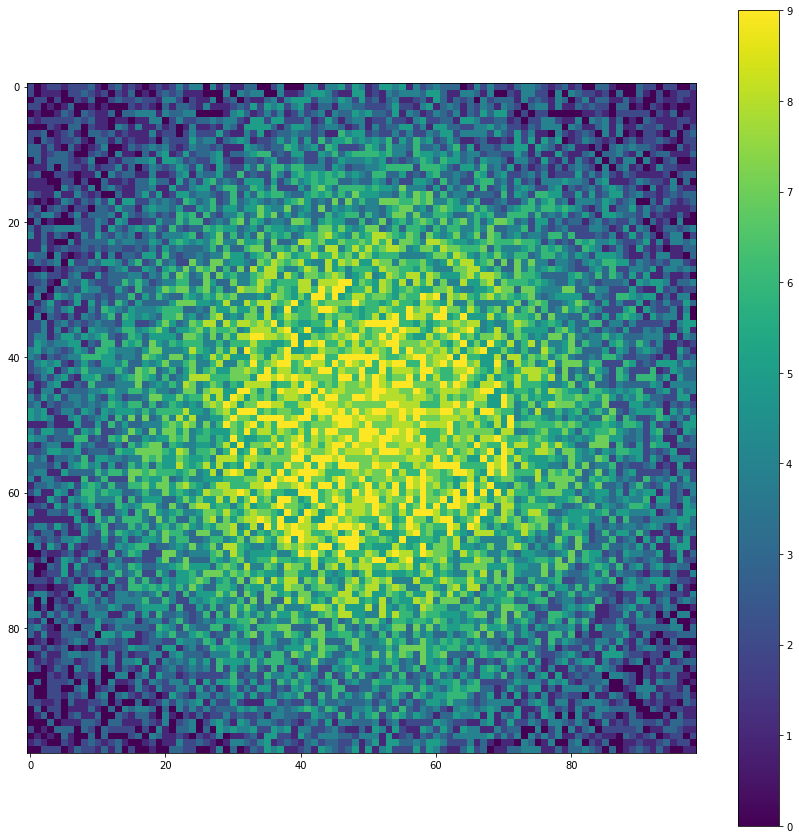

In [227]:
#@title Représentation de la taille des arbres
import numpy as np
import matplotlib.pyplot as plt

H = np.array(parse(input)) 

fig = plt.figure(figsize=(15, 15))
plt.imshow(H)
plt.colorbar(orientation='vertical')
plt.show()

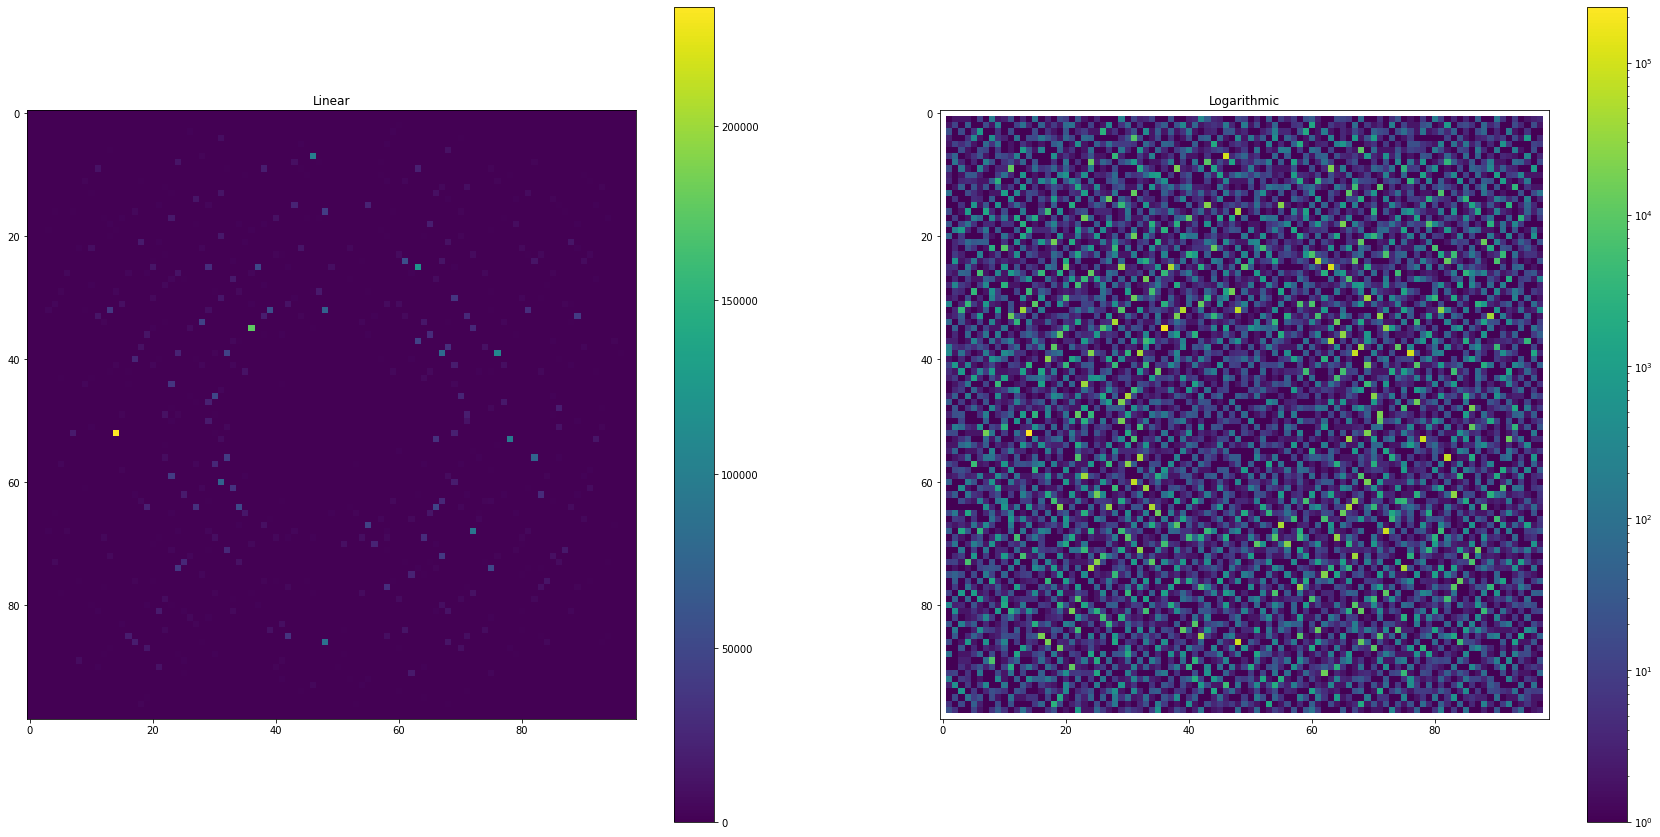

In [231]:
#@title Représentation du scenic score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

H = np.array(to_scenic_score(input)) 

fig, axis =  plt.subplots(1, 2, figsize=(30, 15))

linear = axis[0].imshow(H)
axis[0].set_title("Linear")
fig.colorbar(linear, ax=axis[0])

log = axis[1].imshow(H, norm=LogNorm())
axis[1].set_title("Logarithmic")
fig.colorbar(log, ax=axis[1])

plt.show()